<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCKProject_Ensemblist_Methode09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd

os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data['classe']=data['classe'].replace("hate", int(2))
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = data['commentaire']
labels = data['classe']

labels = [int(i) for i in labels]

def count_words(input):
  return len(input.split())
max_length=count_words(max(sentences,key=count_words))
max_length

388

In [ ]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
L1=data12["classe"]
L2=data34["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])

In [ ]:
training_size=int(len(sentences)*0.8)   #Experimenting setup

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
Nsentences12=data12["sentences"]
Nlabels12=data12["classe"]

training_size12=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences12[training_size12:]
testing_labels12 = Nlabels12[training_size12:]

Nsentences34=data34["sentences"]
Nlabels34=data34["classe"]

training_size34=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences34[training_size34:]
testing_labels34 = Nlabels34[training_size34:]

max_length12=count_words(max(testing_sentences12,key=count_words))
print('Maximum length in the data12: ',max_length12)

max_length34=count_words(max(testing_sentences34,key=count_words))
print('Maximum length in the data34: ',max_length34)

testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

Maximum length in the data12:  206
Maximum length in the data34:  29


#ECOC Algorithm: Classification multi-classes

##First Decomposition: A=0+1 , B=2
##Second Decomposition: A=0+2 , B=1
##Third Decomposition: A=1+2 , B=0
##A-->1 , B-->0

In [ ]:
training_padded1 = np.asarray(training_padded).astype(np.int)
training_labels1 = np.asarray(training_labels).astype(np.int)
testing_padded1 = np.asarray(testing_padded).astype(np.int)
testing_labels1 = np.asarray(testing_labels).astype(np.int)

training_labels1 = np.expand_dims(training_labels, axis=1)
testing_labels1 = np.expand_dims(testing_labels, axis=1)


for i in range(len(training_labels1)):
  if training_labels1[i]==0:
    training_labels1[i]=1
  elif training_labels1[i]==2:
    training_labels1[i]=0

for i in range(len(testing_labels1)):
  if testing_labels1[i]==0:
    testing_labels1[i]=1
  elif testing_labels1[i]==2:
    testing_labels1[i]=0
 
#**********

training_padded2 = training_padded1 
training_labels2 = np.asarray(training_labels).astype(np.int)
testing_padded2 = testing_padded1
testing_labels2 = np.asarray(testing_labels).astype(np.int)

training_labels2 = np.expand_dims(training_labels, axis=1)
testing_labels2 = np.expand_dims(testing_labels, axis=1)


for i in range(len(training_labels2)):
  if training_labels2[i]==1:
    training_labels2[i]=0
  else:
    training_labels2[i]=1


for i in range(len(testing_labels2)):
  if testing_labels2[i]==1:
    testing_labels2[i]=0
  else:
    testing_labels2[i]=1

#**********

training_padded3 = training_padded1 
training_labels3 = np.asarray(training_labels).astype(np.int)
testing_padded3 = testing_padded1
testing_labels3 = np.asarray(testing_labels).astype(np.int)

training_labels3 = np.expand_dims(training_labels, axis=1)
testing_labels3 = np.expand_dims(testing_labels, axis=1)


for i in range(len(training_labels3)):
  if training_labels3[i]==2:
    training_labels3[i]=1

for i in range(len(testing_labels3)):
  if testing_labels3[i]==2:
    testing_labels3[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
import tensorflow as tf

model1=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])

model2=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])

model3=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=1, activation='sigmoid')])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 388, 16)           845584    
                                                                 
 conv1d_6 (Conv1D)           (None, 384, 128)          10368     
                                                                 
 conv1d_7 (Conv1D)           (None, 384, 32)           4128      
                                                                 
 bidirectional_9 (Bidirectio  (None, 384, 64)          16640     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 384, 64)          24832     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 384, 32)         

In [ ]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)
history1 = model1.fit(training_padded1, training_labels1, batch_size=128, epochs=50, validation_data=(testing_padded1, testing_labels1), verbose=1)

model2.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)
history2 = model2.fit(training_padded2, training_labels2, batch_size=128, epochs=50, validation_data=(testing_padded2, testing_labels2), verbose=1)

model3.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)
history3 = model3.fit(training_padded3, training_labels3, batch_size=128, epochs=50, validation_data=(testing_padded3, testing_labels3), verbose=1)

Epoch 1/50
162/162 [==============================] - 37s 210ms/step - loss: 0.5508 - accuracy: 0.7361 - val_loss: 0.4379 - val_accuracy: 0.8103
Epoch 2/50
162/162 [==============================] - 21s 131ms/step - loss: 0.4105 - accuracy: 0.8238 - val_loss: 0.3594 - val_accuracy: 0.8568
Epoch 3/50
162/162 [==============================] - 22s 133ms/step - loss: 0.3688 - accuracy: 0.8435 - val_loss: 0.3280 - val_accuracy: 0.8581
Epoch 4/50
162/162 [==============================] - 22s 139ms/step - loss: 0.3369 - accuracy: 0.8602 - val_loss: 0.2837 - val_accuracy: 0.8798
Epoch 5/50
162/162 [==============================] - 22s 138ms/step - loss: 0.3003 - accuracy: 0.8772 - val_loss: 0.2357 - val_accuracy: 0.9141
Epoch 6/50
162/162 [==============================] - 21s 131ms/step - loss: 0.2570 - accuracy: 0.8995 - val_loss: 0.1920 - val_accuracy: 0.9280
Epoch 7/50
162/162 [==============================] - 21s 129ms/step - loss: 0.2197 - accuracy: 0.9156 - val_loss: 0.1597 - val_ac

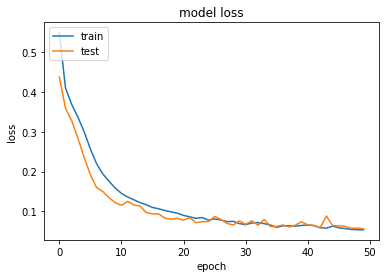

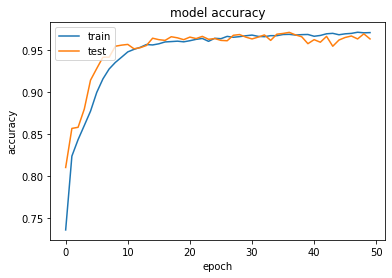

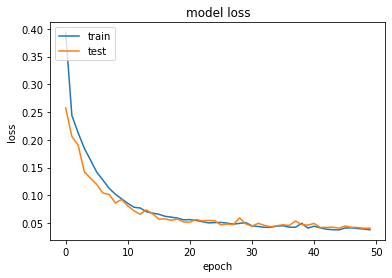

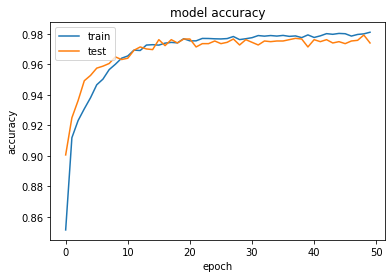

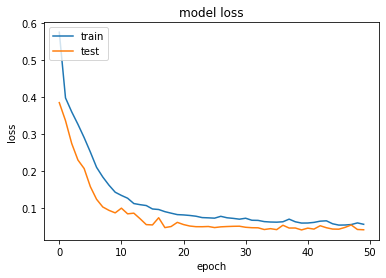

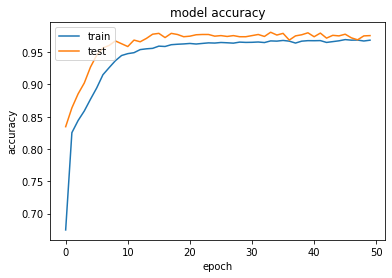

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
L1=model1.predict(testing_padded)
L2=model2.predict(testing_padded)
L3=model3.predict(testing_padded)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

print(P[2])

110


In [ ]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)

In [ ]:
cm = confusion_matrix(testing_labels, pred)
print("For the Ensemblist methode: \n",cm)
print(classification_report(testing_labels, pred, labels=[0,1,2]))

For the Ensemblist methode: 
 [[1263    1    1]
 [  26  378   10]
 [  49   24  552]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1265
           1       0.94      0.91      0.93       414
           2       0.98      0.88      0.93       625

    accuracy                           0.95      2304
   macro avg       0.95      0.93      0.94      2304
weighted avg       0.95      0.95      0.95      2304



In [ ]:
model1.save("Ensemblistmodel1.h5")
model2.save("Ensemblistmodel2.h5")
model3.save("Ensemblistmodel3.h5")

In [ ]:
L1=model1.predict(testing_padded12)
L2=model2.predict(testing_padded12)
L3=model3.predict(testing_padded12)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)


cm = confusion_matrix(testing_labels12, pred)
print("For the Ensemblist methode: \n",cm)
print(classification_report(testing_labels12, pred, labels=[0,1,2]))

For the Ensemblist methode: 
 [[553  15  19]
 [ 77 174   2]
 [104 125 223]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       587
           1       0.55      0.69      0.61       253
           2       0.91      0.49      0.64       452

    accuracy                           0.74      1292
   macro avg       0.74      0.71      0.70      1292
weighted avg       0.77      0.74      0.72      1292



In [ ]:
L1=model1.predict(testing_padded34)
L2=model2.predict(testing_padded34)
L3=model3.predict(testing_padded34)

for i in range(len(L1)):
  if (L1[i]<0.5):
    L1[i]=0
  else:
    L1[i]=1
  if (L2[i]<0.5):
    L2[i]=0
  else:
    L2[i]=1
  if (L3[i]<0.5):
    L3[i]=0
  else:
    L3[i]=1
P=[]
for i in range(len(L1)):
  P.append(str(int(L1[i][0]))+str(int(L2[i][0]))+str(int(L3[i][0])))

pred=[]
for i in range(len(P)):
  if (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'110')):
    pred.append(0)
  elif (min(min(hamming_distance(P[i],'110'),hamming_distance(P[i],'101')),hamming_distance(P[i],'011'))==hamming_distance(P[i],'101')):
    pred.append(1)
  else:
    pred.append(2)


cm = confusion_matrix(testing_labels34, pred)
print("For the Ensemblist methode: \n",cm)
print(classification_report(testing_labels34, pred, labels=[0,1,2]))

For the Ensemblist methode: 
 [[ 516    0   10]
 [   0    7    0]
 [  16    1 1290]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       526
           1       0.88      1.00      0.93         7
           2       0.99      0.99      0.99      1307

    accuracy                           0.99      1840
   macro avg       0.95      0.99      0.97      1840
weighted avg       0.99      0.99      0.99      1840

